### Example: RSD & AP model predictions using the Streaming Model

**pancakes** implement different redshift-space distortions models that can be used to predict the following clustering statistics:

- Galaxy two-point correlation function
- Density split cross-correlation function
- Void-galaxy or cluster-galaxy cross-correlation function

Let us see an example where we will use the Gaussian streaming model to predict the density split CCF.

We will start by creating an instance of the DensitySplit CCF class, which is the main object around which we will build the model predictions. Note that currently the only way to generate the model ingredients for the density split CCF (real space $\xi_r$ and pairwise velocity dispersion $\sigma_{\parallel}(r, mu)$ is through a template, so we need to provide measurements of those quantities. These can be measured using the [**contrast**](https://github.com/epaillas/contrast) package.

In [4]:
from pancakes.models.densitysplit import DensitySplitCCF
import numpy as np

# we read the input parameters from a YAML
# file that can be easily edited
params_file = 'streaming_model.yaml'

# we create an instance of the DensitySplitCCF class
ds = DensitySplitCCF(params_file)

# specify the scales for which we want to make model
# predictions
s = np.linspace(0, 150, 30)
mu = np.linspace(-1, 1, 100)

# predict the redshift-space cross-correlation function
theory_xi = ds.theory_xi_smu(
    fs8=ds.fs8,
    bs8=ds.bs8,
    sigma_v=360,
    q_perp=1.0,
    q_para=1.0,
    s=s,
    mu=mu,
    nu=0.29,
    denbin='DS1',
)

We now decompose the predicted correlation function into multipoles and plot them.

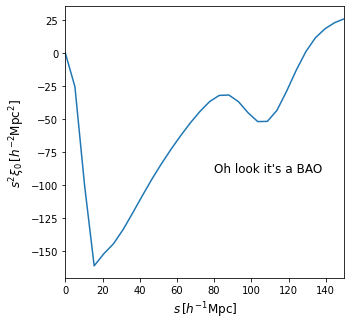

In [16]:
from pancakes.utilities.utilities import get_multipoles
import matplotlib.pyplot as plt
%matplotlib inline

theory_xi0, theory_xi2 = get_multipoles(
    ell=[0, 2],
    s=s,
    mu=mu,
    xi_smu=theory_xi
)

fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(s, s**2*theory_xi0)

ax.set_xlim(0, 150)

ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=12)
ax.set_ylabel(r'$s^2\xi_0\,[h^{-2}{\rm Mpc}^2]$', fontsize=12)
ax.annotate("Oh look it's a BAO", (80, -90), fontsize=12)
plt.show()

We can also predict the CCF with the classic $\sigma$ and $\pi$ binning (directions perpendicular and parallel to the observer's line of sight.

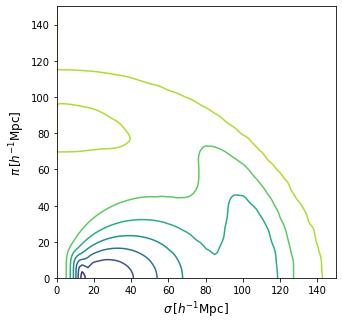

In [19]:
s_perp = np.linspace(0, 150, 100)
s_para = np.linspace(0, 150, 100)

theory_xi = ds.theory_xi_sigmapi(
    fs8=ds.fs8,
    bs8=ds.bs8,
    sigma_v=360,
    q_perp=1.0,
    q_para=1.0,
    s_perp=s_perp,
    s_para=s_para,
    nu = 0.29,
    denbin='DS1',
    squared=True
)

fig, ax = plt.subplots(figsize=(5, 5))

ax.contour(s_perp, s_para, theory_xi)

ax.set_xlabel(r'$\sigma\,[h^{-1}{\rm Mpc}]$', fontsize=12)
ax.set_ylabel(r'$\pi\,[h^{-1}{\rm Mpc}]$', fontsize=12)
plt.show()